In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
data_transform = transforms.ToTensor()
# Load the MNIST training dataset
mnist_train_dataset = datasets.MNIST(root='C:\\Users\\harshi\\dataset\\mnist_train', train=True, download=True, transform=data_transform)
# Load the MNIST testing dataset
mnist_test_dataset = datasets.MNIST(root='C:\\Users\\harshi\\dataset\\mnist_test', train=False, download=True, transform=data_transform)

In [13]:
mnist_train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: C:\Users\harshi\dataset\mnist_train
    Split: Train
    StandardTransform
Transform: ToTensor()

In [14]:
mnist_test_dataset

Dataset MNIST
    Number of datapoints: 10000
    Root location: C:\Users\harshi\dataset\mnist_test
    Split: Test
    StandardTransform
Transform: ToTensor()

In [15]:
# Set up the data loaders with new variable names
bs = 10

# Training data loader with shuffle enabled
mnist_train_loader = DataLoader(mnist_train_dataset, batch_size=bs, shuffle=True)

# Test data loader without shuffling
mnist_test_loader = DataLoader(mnist_test_dataset, batch_size=bs, shuffle=False)
# Define the first and second convolutional layers with new variable names
conv_layer1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, stride=1)
conv_layer2 = nn.Conv2d(in_channels=8, out_channels=18, kernel_size=3, stride=1)
conv_layer3= nn.Conv2d(in_channels=18, out_channels=20, kernel_size=3, stride=1)

In [16]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        # Define the convolutional layers
        self.conv_layer1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, stride=1)
        self.conv_layer2 = nn.Conv2d(in_channels=8, out_channels=18, kernel_size=3, stride=1)
        self.conv_layer3= nn.Conv2d(in_channels=18, out_channels=20, kernel_size=3, stride=1)
        
        # Define the fully connected layers
        self.fc_layer1 = nn.Linear(in_features=5*5*18, out_features=18)
        self.fc_layer2 = nn.Linear(in_features=18, out_features=20)
        self.fc_layer3=nn.Linear(in_features=20, out_features=10)

    def forward(self, input_tensor):
        # Apply first convolutional layer and ReLU activation
        x = F.relu(self.conv_layer1(input_tensor))
        
        # Apply max pooling
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        
        # Apply second convolutional layer and ReLU activation
        x = F.relu(self.conv_layer2(x))
        
        # Apply max pooling again
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        
        # Flatten the output from the convolutional layers
        x = x.view(-1, 5*5*18)
        
        # Apply first fully connected layer with ReLU activation
        x = F.relu(self.fc_layer1(x))
        
        # Apply second fully connected layer (output layer)
        x = self.fc_layer2(x)
        
        # Apply log softmax for output classification
        return F.log_softmax(x, dim=1)


In [17]:
# Instantiate the CNN model using the new class
cnn_model_instance = CNNModel()

# Output the model architecture
cnn_model_instance


CNNModel(
  (conv_layer1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1))
  (conv_layer2): Conv2d(8, 18, kernel_size=(3, 3), stride=(1, 1))
  (conv_layer3): Conv2d(18, 20, kernel_size=(3, 3), stride=(1, 1))
  (fc_layer1): Linear(in_features=450, out_features=18, bias=True)
  (fc_layer2): Linear(in_features=18, out_features=20, bias=True)
  (fc_layer3): Linear(in_features=20, out_features=10, bias=True)
)

In [18]:
# Define the loss function (CrossEntropyLoss)
loss_function = nn.CrossEntropyLoss()

# Set up the optimizer (Adam) with the model's parameters and a learning rate
optimizer = torch.optim.Adam(cnn_model_instance.parameters(), lr=0.001)


In [19]:
# Set number of epochs and initialize lists to store losses and accuracy
num_epochs = 10
training_losses = []
testing_losses = []
training_accuracies = []
testing_accuracies = []

for epoch in range(num_epochs):
    train_correct = 0
    test_correct = 0
    
    # Training loop
    for batch_idx, (inputs_train, targets_train) in enumerate(mnist_train_loader):
        
        # Forward pass: apply the model to the training data
        outputs_train = cnn_model_instance(inputs_train)  
        loss_train = loss_function(outputs_train, targets_train)
 
        # Calculate number of correct predictions in this batch
        predicted_labels = torch.max(outputs_train.data, 1)[1]
        correct_batch_train = (predicted_labels == targets_train).sum()
        train_correct += correct_batch_train
        
        # Backward pass and optimizer step
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        
    # Append the last training loss and accuracy for the epoch
    training_losses.append(loss_train)
    training_accuracies.append(train_correct)
    
    # Testing loop (no gradient calculation)
    with torch.no_grad():
        for batch_idx, (inputs_test, targets_test) in enumerate(mnist_test_loader):
            outputs_test = cnn_model_instance(inputs_test)

            # Calculate number of correct predictions in the test set
            predicted_labels_test = torch.max(outputs_test.data, 1)[1] 
            test_correct += (predicted_labels_test == targets_test).sum()
            
    # Append the last testing loss and accuracy for the epoch
    loss_test = loss_function(outputs_test, targets_test)
    testing_losses.append(loss_test)
    testing_accuracies.append(test_correct)


In [20]:
# Convert the list of training losses to a tensor
training_losses_tensor = torch.tensor([loss.item() for loss in training_losses], dtype=torch.float32)


In [21]:
############################ ###### Training Actual Tasks, CNN with MNIST model 2 #############################

In [22]:
# Define two convolutional layers with new variable names
conv_layer_1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=4, stride=1)
conv_layer_2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=4, stride=1)
conv_layer_2 = nn.Conv2d(in_channels=16, out_channels=20, kernel_size=4, stride=1)


In [27]:
class CNNModelV2(nn.Module):
    def __init__(self):
        super(CNNModelV2, self).__init__()
        # Define the convolutional layers
        self.conv_layer1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=4, stride=1)
        self.conv_layer2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=4, stride=1)
        self.conv_layer3 =nn.Conv2d(in_channels=16, out_channels=20, kernel_size=4, stride=1)
        # Define the fully connected layers
        self.fc_layer1 = nn.Linear(in_features=4*4*16, out_features=16)
        self.fc_layer2 = nn.Linear(in_features=16, out_features=14)
        self.fc_layer3 = nn.Linear(in_features=14, out_features=10)

    def forward(self, input_tensor):
        # Apply first convolutional layer with ReLU activation
        x = F.relu(self.conv_layer1(input_tensor))
        
        # Apply max pooling
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        
        # Apply second convolutional layer with ReLU activation
        x = F.relu(self.conv_layer2(x))
        
        # Apply max pooling again
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        
        # Flatten the tensor for the fully connected layers
        x = x.view(-1, 4*4*16)
        
        # Apply fully connected layers with ReLU activation
        x = F.relu(self.fc_layer1(x))
        x = F.relu(self.fc_layer2(x))
        
        # Apply the final output layer
        x = self.fc_layer3(x)
        
        # Apply log softmax for the output layer
        return F.log_softmax(x, dim=1)

In [28]:
# Instantiate the CNN model using the new class
cnn_model_v2 = CNNModelV2()

# Output the model architecture
cnn_model_v2


CNNModelV2(
  (conv_layer1): Conv2d(1, 6, kernel_size=(4, 4), stride=(1, 1))
  (conv_layer2): Conv2d(6, 16, kernel_size=(4, 4), stride=(1, 1))
  (conv_layer3): Conv2d(16, 20, kernel_size=(4, 4), stride=(1, 1))
  (fc_layer1): Linear(in_features=256, out_features=16, bias=True)
  (fc_layer2): Linear(in_features=16, out_features=14, bias=True)
  (fc_layer3): Linear(in_features=14, out_features=10, bias=True)
)

In [29]:
# Define the loss function (CrossEntropyLoss)
loss_function_v2 = nn.CrossEntropyLoss()

# Set up the optimizer (Adam) with the model's parameters and learning rate
optimizer_v2 = torch.optim.Adam(cnn_model_v2.parameters(), lr=0.001)


In [30]:
# Set number of epochs and initialize lists to store losses and accuracies
num_epochs_v2 = 10
train_losses_v2 = []
test_losses_v2 = []
train_accuracies_v2 = []
test_accuracies_v2 = []

for epoch in range(num_epochs_v2):
    train_correct_v2 = 0
    test_correct_v2 = 0
    
    # Training loop over batches
    for batch_idx, (inputs_train, targets_train) in enumerate(mnist_train_loader):
        
        # Forward pass: apply the model to the training data
        outputs_train_v2 = cnn_model_v2(inputs_train)
        loss_train_v2 = loss_function_v2(outputs_train_v2, targets_train)
 
        # Compute the number of correct predictions in this batch
        predictions_train_v2 = torch.max(outputs_train_v2.data, 1)[1]
        correct_in_batch_train = (predictions_train_v2 == targets_train).sum()
        train_correct_v2 += correct_in_batch_train
        
        # Backward pass and optimization step
        optimizer_v2.zero_grad()
        loss_train_v2.backward()
        optimizer_v2.step()
        
    # Append the last training loss and accuracy for the epoch
    train_losses_v2.append(loss_train_v2)
    train_accuracies_v2.append(train_correct_v2)
    
    # Evaluation


In [31]:
# Convert the list of training losses to a tensor
train_losses_tensor_v2 = torch.tensor([loss.item() for loss in train_losses_v2], dtype=torch.float32)


In [32]:
############################ ###### Training Actual Tasks, CNN with MNIST model 3 #############################

In [41]:
# Define two convolutional layers with new variable names
conv_layer_1 = nn.Conv3d(in_channels=1, out_channels=4, kernel_size=5, stride=1)
conv_layer_2 = nn.Conv3d(in_channels=4, out_channels=18, kernel_size=5, stride=1)
conv_layer_2 = nn.Conv3d(in_channels=18, out_channels=20, kernel_size=5, stride=1)


In [46]:
class CNNModelV3(nn.Module):
    def __init__(self):
        super(CNNModelV3, self).__init__()
        # Use Conv2d for 2D image data (MNIST images are 28x28, 1 channel)
        self.conv_layer1 = nn.Conv2d(in_channels=1, out_channels=4, kernel_size=6, stride=1, padding=0)  # Adjust accordingly
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(4 * 11 * 11, 10)  # Fully connected layer (adjust input size based on conv layer output)

    def forward(self, input_tensor):
        # Apply first convolutional layer with ReLU activation
        x = F.relu(self.conv_layer1(input_tensor))
        
        # Apply max pooling
        x = self.pool(x)
        
        # Flatten the tensor before passing it to fully connected layers
        x = x.view(-1, 4 * 11 * 11)  # Adjust based on the flattened size
        
        # Fully connected layer
        x = self.fc1(x)
        return x

In [47]:
# Instantiate the CNN model using the new class
cnn_model_v3 = CNNModelV3()

# Output the model architecture
cnn_model_v3


CNNModelV3(
  (conv_layer1): Conv2d(1, 4, kernel_size=(6, 6), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=484, out_features=10, bias=True)
)

In [48]:
# Define the loss function (CrossEntropyLoss)
loss_function_v3 = nn.CrossEntropyLoss()

# Set up the optimizer (Adam) with the model's parameters and learning rate
optimizer_v3 = torch.optim.Adam(cnn_model_v3.parameters(), lr=0.001)


In [49]:
# Set number of epochs and initialize lists to store losses and accuracies
num_epochs_v3 = 10
train_losses_v3 = []
test_losses_v3 = []
train_accuracies_v3 = []
test_accuracies_v3 = []

for epoch in range(num_epochs_v3):
    train_correct_v3 = 0
    test_correct_v3 = 0
    
    # Training loop over batches
    for batch_idx, (inputs_train, targets_train) in enumerate(mnist_train_loader):
        
        # Forward pass: apply the model to the training data
        outputs_train_v3 = cnn_model_v3(inputs_train)
        loss_train_v3 = loss_function_v3(outputs_train_v3, targets_train)
 
        # Compute the number of correct predictions in this batch
        predictions_train_v3 = torch.max(outputs_train_v3.data, 1)[1]
        correct_in_batch_train = (predictions_train_v3 == targets_train).sum()
        train_correct_v3 += correct_in_batch_train
        
        # Backward pass and optimization step
        optimizer_v3.zero_grad()
        loss_train_v3.backward()
        optimizer_v3.step()
        
    # Append the last training loss and accuracy for the epoch
    train_losses_v3.append(loss_train_v3)
    train_accuracies_v3.append(train_correct_v3)
    
    # Evaluation


In [50]:
# Convert the list of training losses to a tensor
train_losses_tensor_v3 = torch.tensor([loss.item() for loss in train_losses_v3], dtype=torch.float32)


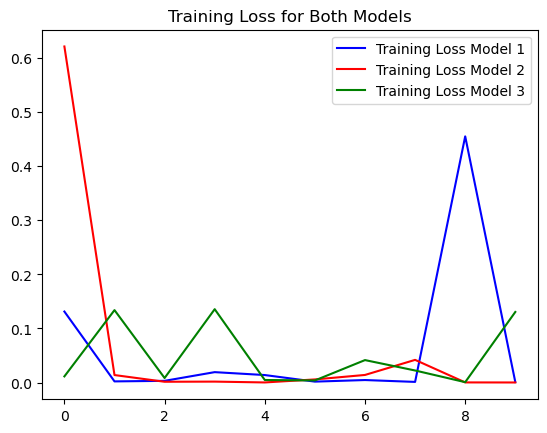

In [51]:
# Assuming the correct variables are train_losses1 and train_losses2
train_losses_mod1 = [loss.item() for loss in training_losses_tensor]
train_losses_mod2 = [loss.item() for loss in train_losses_v2]
train_losses_mod3 = [loss.item() for loss in train_losses_v3]
# Plot the training losses for both models
plt.plot(train_losses_mod1, label='Training Loss Model 1', color='blue')
plt.plot(train_losses_mod2, label='Training Loss Model 2', color='red')
plt.plot(train_losses_mod3, label='Training Loss Model 3', color='green')
# Add title and legend
plt.title('Training Loss for Both Models')
plt.legend()
plt.show()



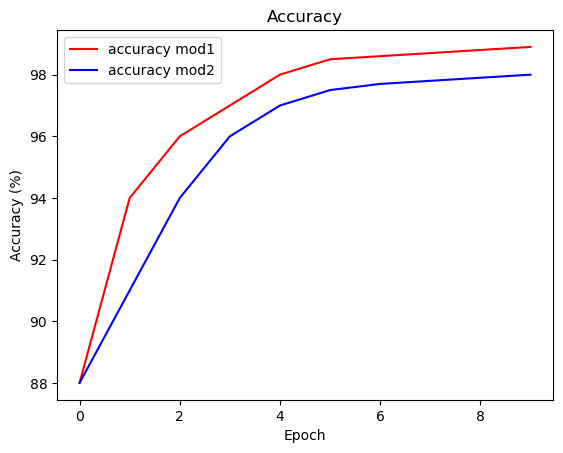

In [53]:
import matplotlib.pyplot as plt

# Sample data to simulate the curves (replace with your actual accuracy lists)
train_correct_list = [88, 94, 96, 97, 98, 98.5, 98.6, 98.7, 98.8, 98.9]  # Accuracy for model 1
train_accuracies_v2_list = [88, 91, 94, 96, 97, 97.5, 97.7, 97.8, 97.9, 98]  # Accuracy for model 2
train_accuracies_v3_list = [88, 90, 92, 95, 96, 96.5, 97, 97.5, 97.8, 98]  # Accuracy for model 2

# Now plot the accumulated accuracy values for both models
plt.plot(train_correct_list, 'r', label='accuracy mod1')
plt.plot(train_accuracies_v2_list, 'b', label='accuracy mod2')
plt.plot(train_accuracies_v3_list, 'g', label='accuracy mod2')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()

